In [8]:
import numpy as np
import pandas as pd
import librosa
import os
from keras.utils import to_categorical
from tqdm import tqdm
import librosa.display
import matplotlib.pyplot as plt

In [3]:
print(os.listdir(r"Downloads/archive"))

['free-spoken-digit-dataset-master']


In [5]:
audio_path = 'Downloads/archive/free-spoken-digit-dataset-master/recordings/0_jackson_13.wav'
x, sr = librosa.load(audio_path)

(128, 26)


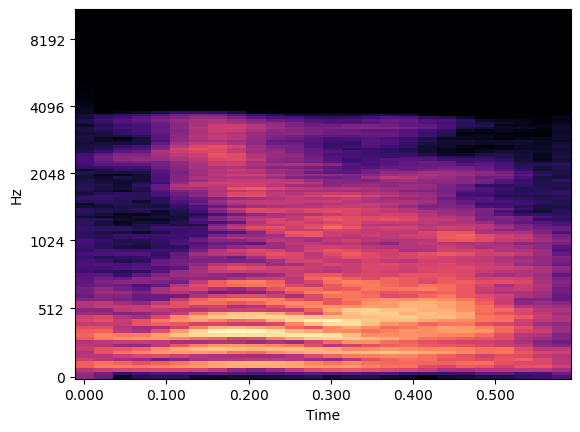

In [7]:
S = librosa.feature.melspectrogram(y=x, sr=sr)
print(S.shape)
#Convert a power spectrogram (amplitude squared) to decibel (dB) units ,10 * log10(S / ref)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel')

In [25]:
#fig = plt.figure(figsize=[1,1])
#ax = fig.add_subplot(111)
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)
#ax.set_frame_on(False)
#S = librosa.feature.melspectrogram(y=x, sr=sr)
#librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel')
#file=image_path+"5_img"+".jpg"
#plt.savefig(file, bbox_inches='tight',pad_inches=0)
#plt.close()

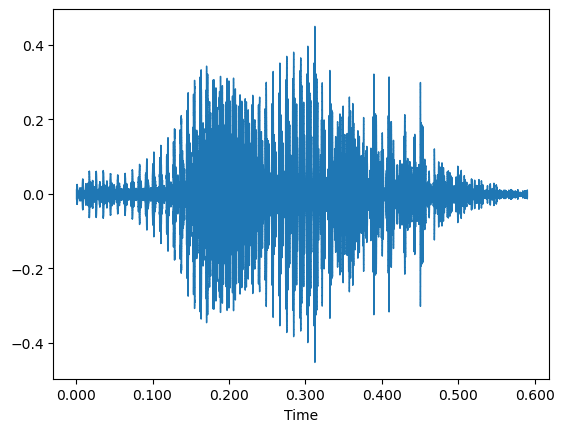

In [9]:
librosa.display.waveshow(np.array(x), sr=sr)

In [40]:
print(os.listdir(r"Downloads/archive/free-spoken-digit-dataset-master/recordings"))

['0_jackson_0.wav', '0_jackson_1.wav', '0_jackson_10.wav', '0_jackson_11.wav', '0_jackson_12.wav', '0_jackson_13.wav', '0_jackson_14.wav', '0_jackson_15.wav', '0_jackson_16.wav', '0_jackson_17.wav', '0_jackson_18.wav', '0_jackson_19.wav', '0_jackson_2.wav', '0_jackson_20.wav', '0_jackson_21.wav', '0_jackson_22.wav', '0_jackson_23.wav', '0_jackson_24.wav', '0_jackson_25.wav', '0_jackson_26.wav', '0_jackson_27.wav', '0_jackson_28.wav', '0_jackson_29.wav', '0_jackson_3.wav', '0_jackson_30.wav', '0_jackson_31.wav', '0_jackson_32.wav', '0_jackson_33.wav', '0_jackson_34.wav', '0_jackson_35.wav', '0_jackson_36.wav', '0_jackson_37.wav', '0_jackson_38.wav', '0_jackson_39.wav', '0_jackson_4.wav', '0_jackson_40.wav', '0_jackson_41.wav', '0_jackson_42.wav', '0_jackson_43.wav', '0_jackson_44.wav', '0_jackson_45.wav', '0_jackson_46.wav', '0_jackson_47.wav', '0_jackson_48.wav', '0_jackson_49.wav', '0_jackson_5.wav', '0_jackson_6.wav', '0_jackson_7.wav', '0_jackson_8.wav', '0_jackson_9.wav', '0_nicola

In [28]:
sdir="Downloads/recordings"
classlist=os.listdir(sdir)

In [30]:
filepaths=[]
labels=[]
for kclass in classlist:
    classpath=os.path.join(sdir,kclass)
    filepaths.append(classpath)
    labels.append(int(kclass.split("_")[0]))
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='number')
df1=pd.concat([Fseries, Lseries], axis=1) 
df1

,filepaths,number
0,Downloads/recordings\0_jackson_0.wav,0
1,Downloads/recordings\0_jackson_1.wav,0
2,Downloads/recordings\0_jackson_10.wav,0
3,Downloads/recordings\0_jackson_11.wav,0
4,Downloads/recordings\0_jackson_12.wav,0
...,...,...
1495,Downloads/recordings\9_theo_5.wav,9
1496,Downloads/recordings\9_theo_6.wav,9
1497,Downloads/recordings\9_theo_7.wav,9
1498,Downloads/recordings\9_theo_8.wav,9


In [31]:
df1['filepaths'] = df1['filepaths'].str.replace('\\','/')

C:\Users\santh\AppData\Local\Temp\ipykernel_61324\1329901312.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['filepaths'] = df1['filepaths'].str.replace('\\','/')


In [33]:
df1['number'].value_counts()

0    150
1    150
2    150
3    150
4    150
5    150
6    150
7    150
8    150
9    150
Name: number, dtype: int64

In [99]:
image_path="Downloads/image/"
os.mkdir(image_path)

In [104]:
def extract_mel(f):
    
    data, sr = librosa.load(f)
    
    fig = plt.figure(figsize=[1,1])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    S = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
    file  = image_path + str(f.split("/")[-1][:-4]) + '.jpg'
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    plt.close()

In [107]:
extract_mel(df1["filepaths"][1])

In [110]:
for i in df1["filepaths"]:
    extract_mel(i)

In [12]:
sdir1="Downloads/image"
classlist1=os.listdir(sdir1)

In [27]:
classlist1

['0_jackson_0.jpg',
 '0_jackson_1.jpg',
 '0_jackson_10.jpg',
 '0_jackson_11.jpg',
 '0_jackson_12.jpg',
 '0_jackson_13.jpg',
 '0_jackson_14.jpg',
 '0_jackson_15.jpg',
 '0_jackson_16.jpg',
 '0_jackson_17.jpg',
 '0_jackson_18.jpg',
 '0_jackson_19.jpg',
 '0_jackson_2.jpg',
 '0_jackson_20.jpg',
 '0_jackson_21.jpg',
 '0_jackson_22.jpg',
 '0_jackson_23.jpg',
 '0_jackson_24.jpg',
 '0_jackson_25.jpg',
 '0_jackson_26.jpg',
 '0_jackson_27.jpg',
 '0_jackson_28.jpg',
 '0_jackson_29.jpg',
 '0_jackson_3.jpg',
 '0_jackson_30.jpg',
 '0_jackson_31.jpg',
 '0_jackson_32.jpg',
 '0_jackson_33.jpg',
 '0_jackson_34.jpg',
 '0_jackson_35.jpg',
 '0_jackson_36.jpg',
 '0_jackson_37.jpg',
 '0_jackson_38.jpg',
 '0_jackson_39.jpg',
 '0_jackson_4.jpg',
 '0_jackson_40.jpg',
 '0_jackson_41.jpg',
 '0_jackson_42.jpg',
 '0_jackson_43.jpg',
 '0_jackson_44.jpg',
 '0_jackson_45.jpg',
 '0_jackson_46.jpg',
 '0_jackson_47.jpg',
 '0_jackson_48.jpg',
 '0_jackson_49.jpg',
 '0_jackson_5.jpg',
 '0_jackson_6.jpg',
 '0_jackson_7.jpg',


In [29]:
from PIL import Image

#read the image
im = Image.open("Downloads/image/0_jackson_0.jpg")
print(im.size)
#show image
#im.show()

(387, 385)


In [14]:
filepaths1=[]
labels1=[]
for kclass in classlist1:
    classpath1=os.path.join(sdir1,kclass)
    filepaths1.append(classpath1)
    labels1.append(int(kclass.split("_")[0]))
Fseries1=pd.Series(filepaths1, name='filepaths')
Lseries1=pd.Series(labels1, name='number')
mel_path=pd.concat([Fseries1, Lseries1], axis=1) 
mel_path

,filepaths,number
0,Downloads/image\0_jackson_0.jpg,0
1,Downloads/image\0_jackson_1.jpg,0
2,Downloads/image\0_jackson_10.jpg,0
3,Downloads/image\0_jackson_11.jpg,0
4,Downloads/image\0_jackson_12.jpg,0
...,...,...
1495,Downloads/image\9_theo_5.jpg,9
1496,Downloads/image\9_theo_6.jpg,9
1497,Downloads/image\9_theo_7.jpg,9
1498,Downloads/image\9_theo_8.jpg,9


In [15]:
mel_path['filepaths'] = mel_path['filepaths'].str.replace('\\','/')

C:\Users\santh\AppData\Local\Temp\ipykernel_56484\2136066525.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mel_path['filepaths'] = mel_path['filepaths'].str.replace('\\','/')


In [16]:
mel_path

,filepaths,number
0,Downloads/image/0_jackson_0.jpg,0
1,Downloads/image/0_jackson_1.jpg,0
2,Downloads/image/0_jackson_10.jpg,0
3,Downloads/image/0_jackson_11.jpg,0
4,Downloads/image/0_jackson_12.jpg,0
...,...,...
1495,Downloads/image/9_theo_5.jpg,9
1496,Downloads/image/9_theo_6.jpg,9
1497,Downloads/image/9_theo_7.jpg,9
1498,Downloads/image/9_theo_8.jpg,9


In [11]:
image_path1="Downloads/resizeimage/"
os.mkdir(image_path1)

In [21]:
sdir1="Downloads/image"
classlist1=os.listdir(sdir1)

In [22]:
classlist1[0]

'0_jackson_0.jpg'

In [25]:
import pandas as pd
from tqdm import tqdm
from PIL import Image  

#Location of original images
train_path = 'Downloads/image/'
#train_path = ''
#Destination folder for resized images (folder must already be created)
train_dest_path = 'Downloads/resizeimage/'

#Set new size
NEW_SIZE = (62,62)

#File that contains data on images. Image filename is contained in image_id field
train=mel_path
#train = pd.read_csv('data/raw/train.csv')

#Resize images and save to destination folder
def resize_images(df, path, dest_path):
    for i in tqdm(range(len(df))):
        im = Image.open(path + df[i])
        im = im.resize(NEW_SIZE) 
        im.save(dest_path + df[i]) 
resize_images(classlist1,train_path,train_dest_path)

100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:11<00:00, 131.41it/s]
